## Objectives:

- To predict whether a liability customer will buy a personal loan or not.
- Which variables are most significant.
- Which segment of customers should be targeted more.

## Data:

</b>Loan_modelling.csv</b> - contains customer information of AllLife Bank
- ID: Customer ID
- Age: Customer’s age in completed years
- Experience: #years of professional experience
- Income: Annual income of the customer (in thousand dollars)
- ZIP Code: Home Address ZIP code.
- Family: the Family size of the customer
- CCAvg: Average spending on credit cards per month (in thousand dollars)
- Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
- Mortgage: Value of house mortgage if any. (in thousand dollars)
- Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
- Securities_Account: Does the customer have securities account with the bank?
- CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
- Online: Do customers use internet banking facilities?
- CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?

### Import Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from uszipcode import SearchEngine
search = SearchEngine(simple_zipcode=False)
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    plot_confusion_matrix,
    make_scorer,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
)


### Read the dataset

In [2]:
loan_data = pd.read_csv("Loan_modelling.csv")

In [3]:
#Copying data to a new variable as to not mess up original
df = loan_data.copy()

### View the dataset

In [4]:
df.head()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [5]:
df.tail()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
4995  4996   29           3      40    92697       1    1.9          3   
4996  4997   30           4      15    92037       4    0.4          1   
4997  4998   63          39      24    93023       2    0.3          3   
4998  4999   65          40      49    90034       3    0.5          2   
4999  5000   28           4      83    92612       3    0.8          1   

      Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  
4995           0  
4996           0  
4997           0  
4998           0  
4999           1

- ID and the index are the same
- Income, CCAvg and Mortgage are to be read in thousands

### Understand the shape

In [6]:
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")  # f-string

There are 5000 rows and 14 columns.


### Check the duplications

In [7]:
df[df.duplicated()].count()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

### Check the datatypes

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


### Fixing data types

In [9]:
bool_var = ['Personal_Loan', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard']
#changing types
for colname in bool_var:
    df[colname] = df[colname].astype('bool')

categorical_var = ['Education']
for colname in categorical_var:
    df[colname] = df[colname].astype('category')
    
#checking if properly changed
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   ID                  5000 non-null   int64   
 1   Age                 5000 non-null   int64   
 2   Experience          5000 non-null   int64   
 3   Income              5000 non-null   int64   
 4   ZIPCode             5000 non-null   int64   
 5   Family              5000 non-null   int64   
 6   CCAvg               5000 non-null   float64 
 7   Education           5000 non-null   category
 8   Mortgage            5000 non-null   int64   
 9   Personal_Loan       5000 non-null   bool    
 10  Securities_Account  5000 non-null   bool    
 11  CD_Account          5000 non-null   bool    
 12  Online              5000 non-null   bool    
 13  CreditCard          5000 non-null   bool    
dtypes: bool(5), category(1), float64(1), int64(7)
memory usage: 342.1 KB


### Alter the data to better fit the descriptions

In [10]:
#Simple function to multiply a number by 1000
def num_by_thousand(number):
    if isinstance(number,int) or isinstance(number,float):
        return(number * 1000)

In [11]:
#application of function to display true values
df["Income"] = df["Income"].apply(num_by_thousand)
df["Mortgage"] = df["Mortgage"].apply(num_by_thousand)
df["CCAvg"] = df["CCAvg"].apply(num_by_thousand)
df["CCAvg"] = df["CCAvg"].astype('int64')
#checking if properly changed
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   ID                  5000 non-null   int64   
 1   Age                 5000 non-null   int64   
 2   Experience          5000 non-null   int64   
 3   Income              5000 non-null   int64   
 4   ZIPCode             5000 non-null   int64   
 5   Family              5000 non-null   int64   
 6   CCAvg               5000 non-null   int64   
 7   Education           5000 non-null   category
 8   Mortgage            5000 non-null   int64   
 9   Personal_Loan       5000 non-null   bool    
 10  Securities_Account  5000 non-null   bool    
 11  CD_Account          5000 non-null   bool    
 12  Online              5000 non-null   bool    
 13  CreditCard          5000 non-null   bool    
dtypes: bool(5), category(1), int64(8)
memory usage: 342.1 KB


In [12]:
#checking to see implementation
df.head()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg Education  Mortgage  \
0   1   25           1   49000    91107       4   1600         1         0   
1   2   45          19   34000    90089       3   1500         1         0   
2   3   39          15   11000    94720       1   1000         1         0   
3   4   35           9  100000    94112       1   2700         2         0   
4   5   35           8   45000    91330       4   1000         2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0          False                True       False   False       False  
1          False                True       False   False       False  
2          False               False       False   False       False  
3          False               False       False   False       False  
4          False               False       False   False        True

### Check for missing values

In [13]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

### Dataset Summary

In [14]:
df.describe().T

count        mean            std      min       25%      50%  \
ID          5000.0   2500.5000    1443.520003      1.0   1250.75   2500.5   
Age         5000.0     45.3384      11.463166     23.0     35.00     45.0   
Experience  5000.0     20.1046      11.467954     -3.0     10.00     20.0   
Income      5000.0  73774.2000   46033.729321   8000.0  39000.00  64000.0   
ZIPCode     5000.0  93169.2570    1759.455086  90005.0  91911.00  93437.0   
Family      5000.0      2.3964       1.147663      1.0      1.00      2.0   
CCAvg       5000.0   1937.9380    1747.658980      0.0    700.00   1500.0   
Mortgage    5000.0  56498.8000  101713.802102      0.0      0.00      0.0   

                  75%       max  
ID            3750.25    5000.0  
Age             55.00      67.0  
Experience      30.00      43.0  
Income       98000.00  224000.0  
ZIPCode      94608.00   96651.0  
Family           3.00       4.0  
CCAvg         2500.00   10000.0  
Mortgage    101000.00  635000.0

- slight right skew on Age, Experience, Family
- large right skew on Income
- left skew on CCAvg
- large left skew on Mortgage
- Zipcode while numerical acts as a category

In [15]:
df.describe(include=["object", "bool"])

Personal_Loan Securities_Account CD_Account Online CreditCard
count           5000               5000       5000   5000       5000
unique             2                  2          2      2          2
top            False              False      False   True      False
freq            4520               4478       4698   2984       3530

### Zip Code Mapping

In [16]:
#creating lists that will be filled with information based on zipcode
cities = []
counties = []
for i in np.arange(0,len(df['ZIPCode'])):
    zipcode = search.by_zipcode(df['ZIPCode'][i])
    cities.append(zipcode.major_city)
    counties.append(zipcode.county)


In [17]:
print(f"There are {len(set(cities))} unique cities")
print(f"There are {len(set(counties))} unique counties")
#since there are too many cities we will not implement them as a column

There are 245 unique cities
There are 39 unique counties


In [18]:
#applying lists as new columns
df['County'] = counties
df["County"] = df["County"].astype('category')

In [19]:
#checking the new change
df.head()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg Education  Mortgage  \
0   1   25           1   49000    91107       4   1600         1         0   
1   2   45          19   34000    90089       3   1500         1         0   
2   3   39          15   11000    94720       1   1000         1         0   
3   4   35           9  100000    94112       1   2700         2         0   
4   5   35           8   45000    91330       4   1000         2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  \
0          False                True       False   False       False   
1          False                True       False   False       False   
2          False               False       False   False       False   
3          False               False       False   False       False   
4          False               False       False   False        True   

                 County  
0    Los Angeles County  
1    Los Angeles County  
2        Alameda County  
3  San Francisco County  
4    Los Angeles County

# EDA

## Univariate Analysis

In [20]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [21]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### Observations on Age

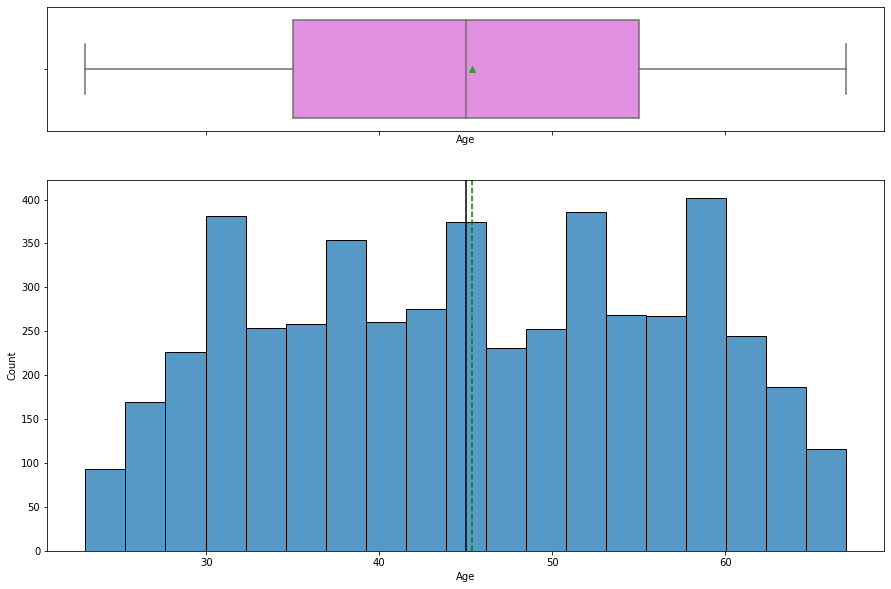

In [22]:
histogram_boxplot(df,"Age")

- No outliers in the variable
- The distribution of Age very slightly right skewed

### Observations on Experience

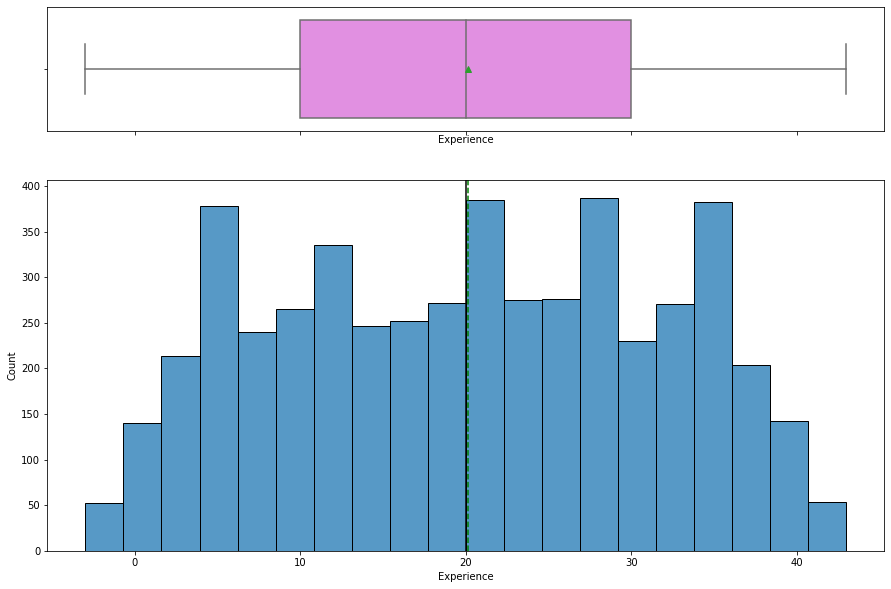

In [23]:
histogram_boxplot(df,"Experience")

- The distribution of Experience is slightly right skewed
- No outliers in this variable

### Observation on Income

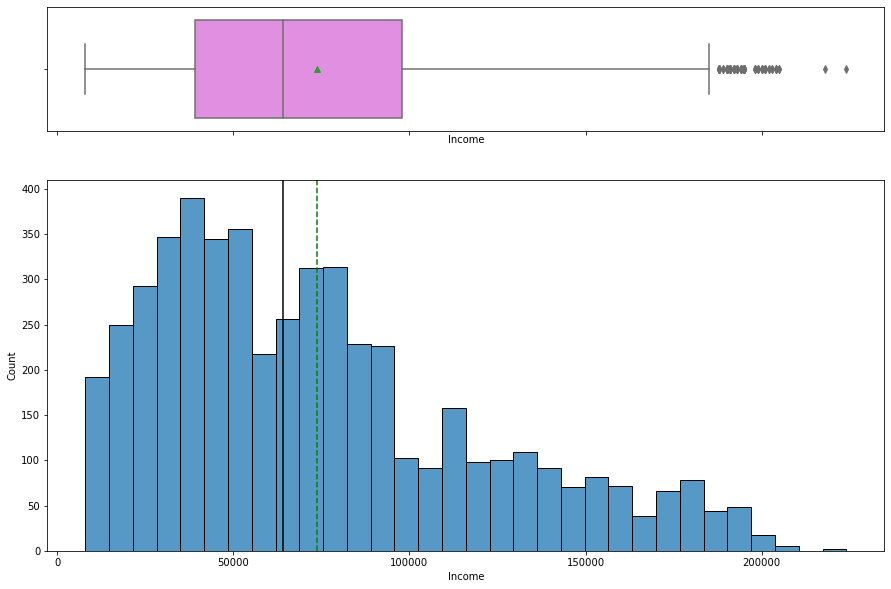

In [24]:
histogram_boxplot(df,"Income")

- The distribution of income is right-skewed.
- There are outliers in this variable
- We can see the third quartile is 98000 which means 75% of customers have an income of 98000

### Observation on Family

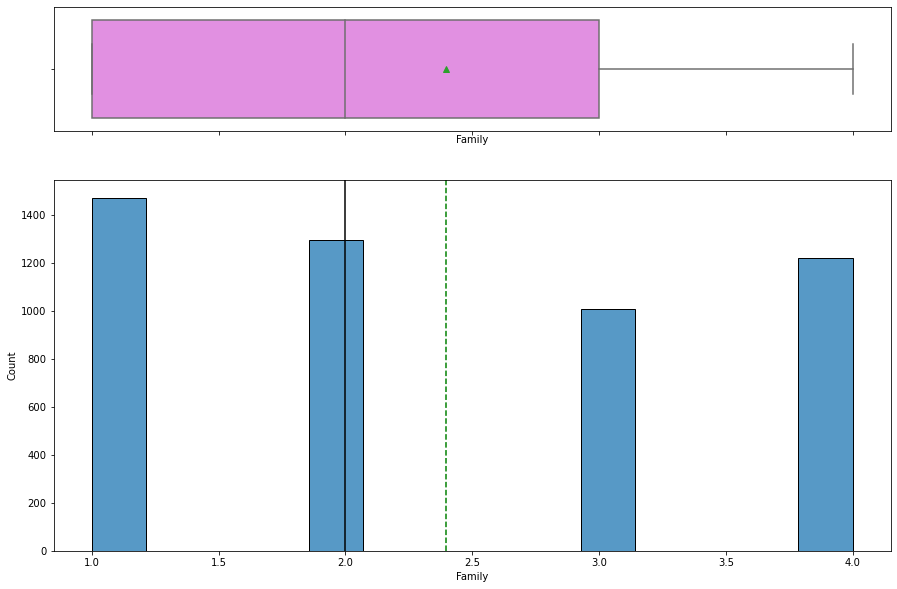

In [25]:
histogram_boxplot(df,"Family")

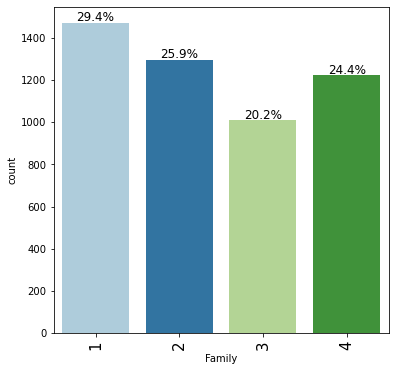

In [26]:
labeled_barplot(df, "Family", perc=True)

- Variable is in discrete numbers because it is representative of family unit
- The Family distribution is right skewed. 
- No outliers in this variable
- Most customers have 1 person families (29.4%) followed by 2-person (25.9%) and 4 person(24.4%)

### Observation on CCAvg

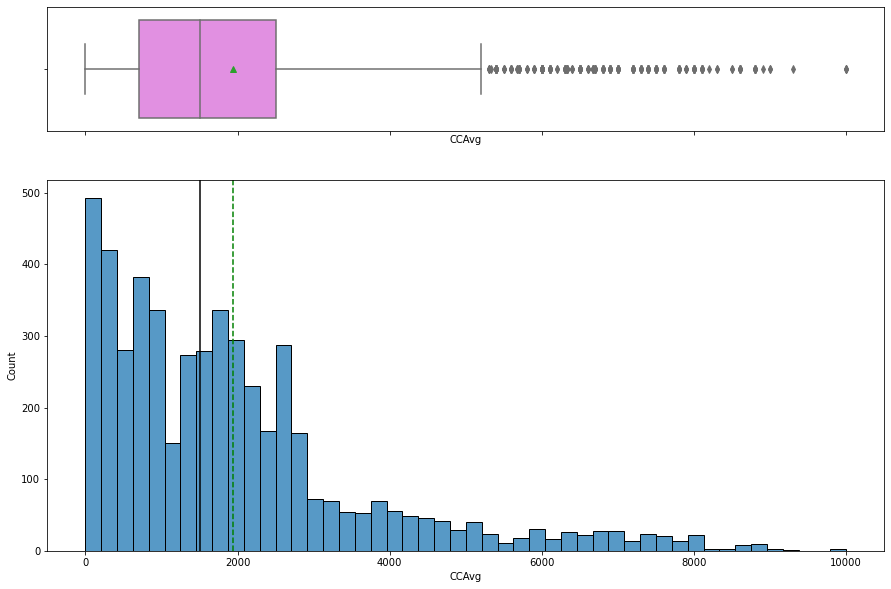

In [27]:
histogram_boxplot(df,"CCAvg")

- The variable CCAvg is right-skewed
- There are outliers on this variable
- Third quartile is 2500, meaning that 75% of customers spend atleast 2500 dollars on credit cards

### Observations on Education

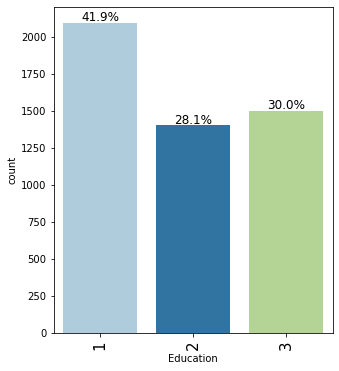

In [28]:
labeled_barplot(df, "Education", perc=True)

- Most customers have an undergraduate level of Education at 41.9%
- The second highest group of customers have an advanced/professional level of education (30%) and finally the smallest group of customers have a Graduate level of education

### Observation on Mortgage

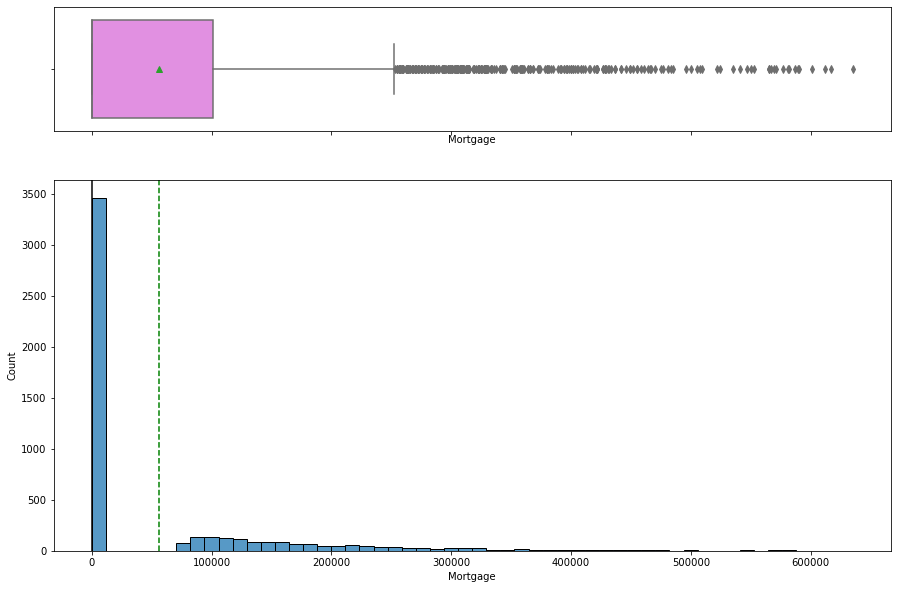

In [29]:
histogram_boxplot(df,"Mortgage")

- Heavily right skewed, due to the large amount of customers with no mortgage
- Many outliers due to large amount of customers not having a mortgage
- Third quartile at 101000 dollars, 75% of customers have a mortgage of 101000 or less

### Observations on Personal_Loan

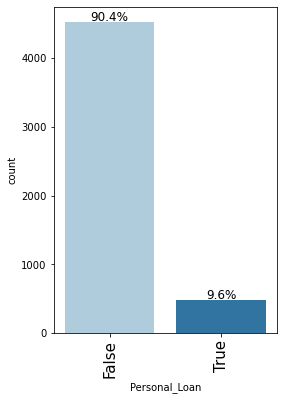

In [30]:
labeled_barplot(df, "Personal_Loan", perc=True)

- Most customers did not accept a personal loan that was offered in the last campaign (90.4%)

### Observations on Securities_Account

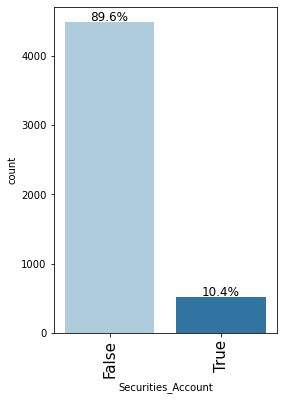

In [31]:
labeled_barplot(df, "Securities_Account", perc=True)

- Most customers do not have a security loan with the bank (89.6%)

### Observations on CD_Account

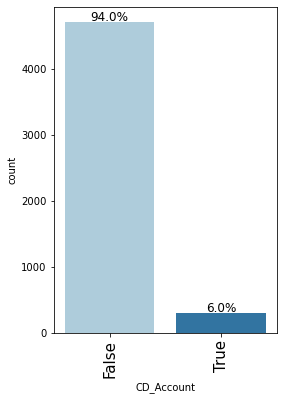

In [32]:
labeled_barplot(df, "CD_Account", perc=True)

- Most customers do not have a certificate of deposit account with the bank (94%)

### Observations on Online

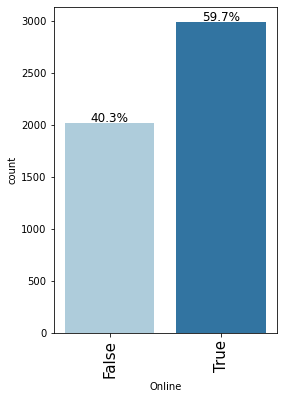

In [33]:
labeled_barplot(df, "Online", perc=True)

- Most customers use internet banking facilities (59.7%)

### Observations on CreditCard

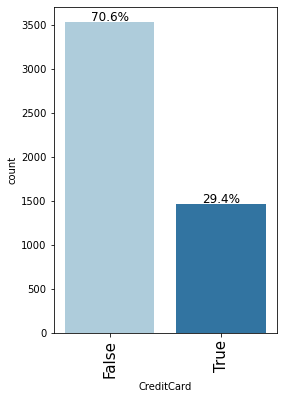

In [34]:
labeled_barplot(df, "CreditCard", perc=True)

- Most customers do not use a credit card issued by other banks (70.6%)

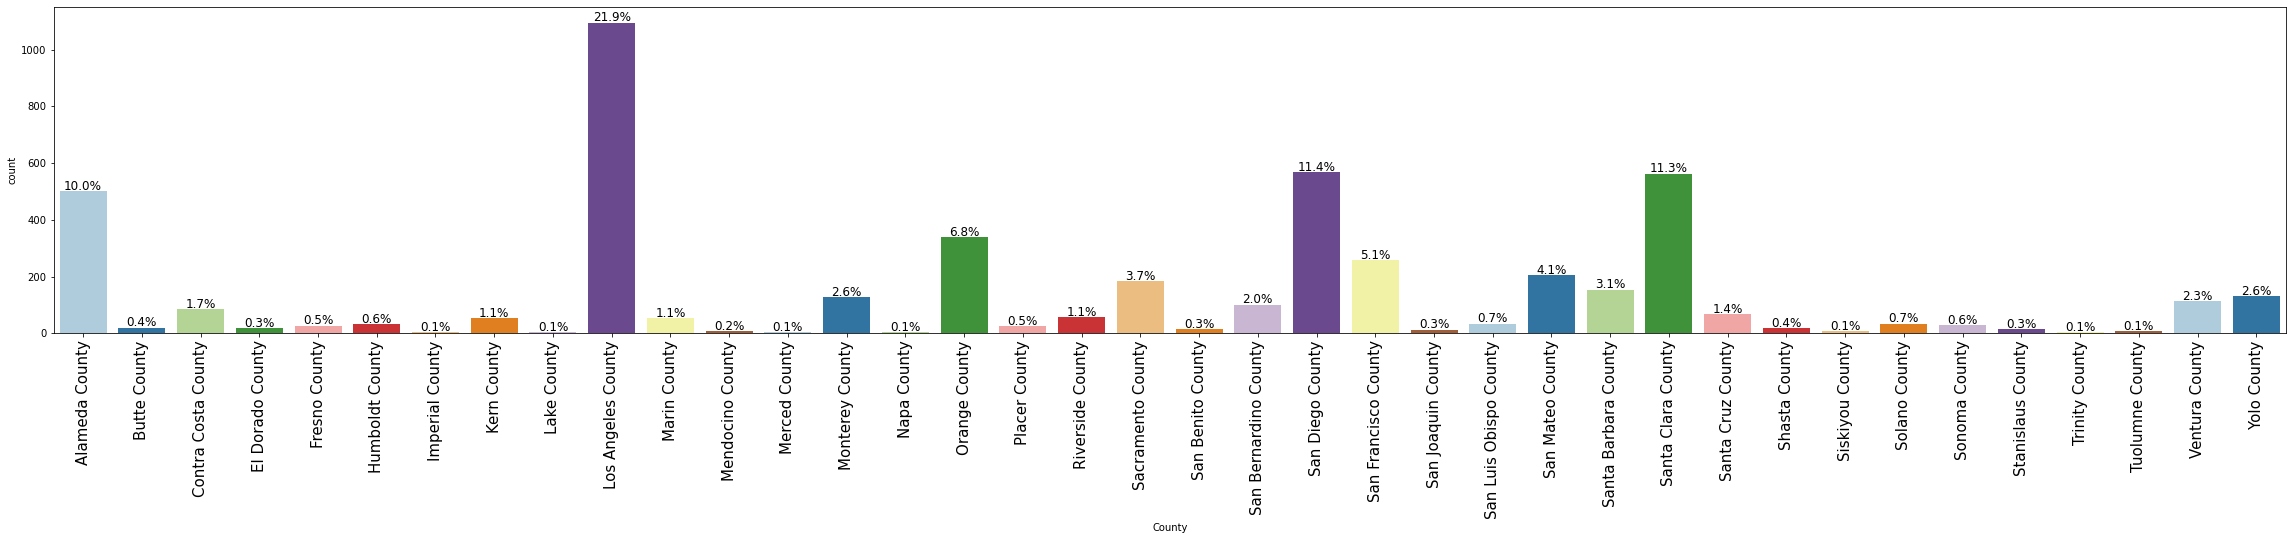

In [35]:
labeled_barplot(df, "County", perc=True)

- Most customers are from Los Angeles County (21.9%)
- The following 3 highest in order are San Diego County, Santa Clara County and Alemeda county at 11.4% ,11.3% and 10.0% respectively

## Bivariate Analysis

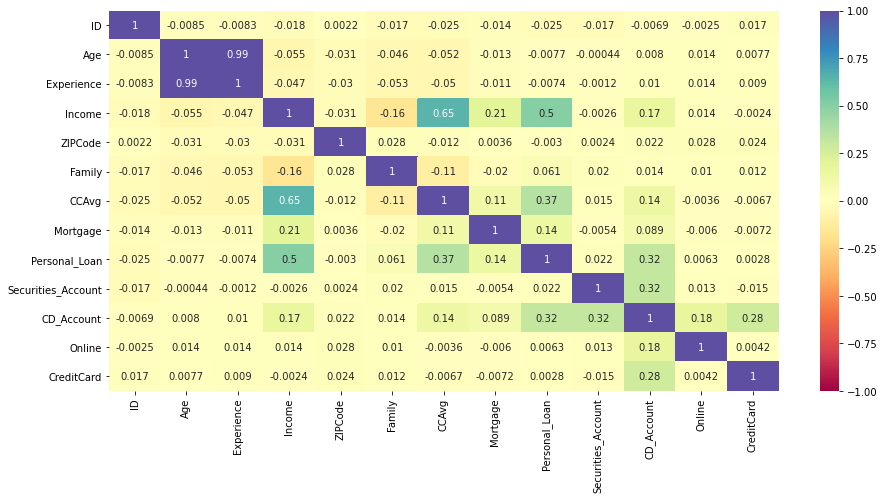

In [36]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, cmap="Spectral")
plt.show()

- Age very highly correlated with years of professional experience, this makes logical sense, generally the longer you live the longer you've worked
- Income positively correlated with taking a personal loan, Taking out a Mortgage and average spending, this makes sense as custoemrs would have more money and a higher credit score to take out loans and save for big purchases as well as spend more on average.
- Whether a customer takes out  a Personal Loan is positively correlated with having a CD account
- Having a CD account is also positively correlated with having a CreditCard at a different bank and having a Security Account.

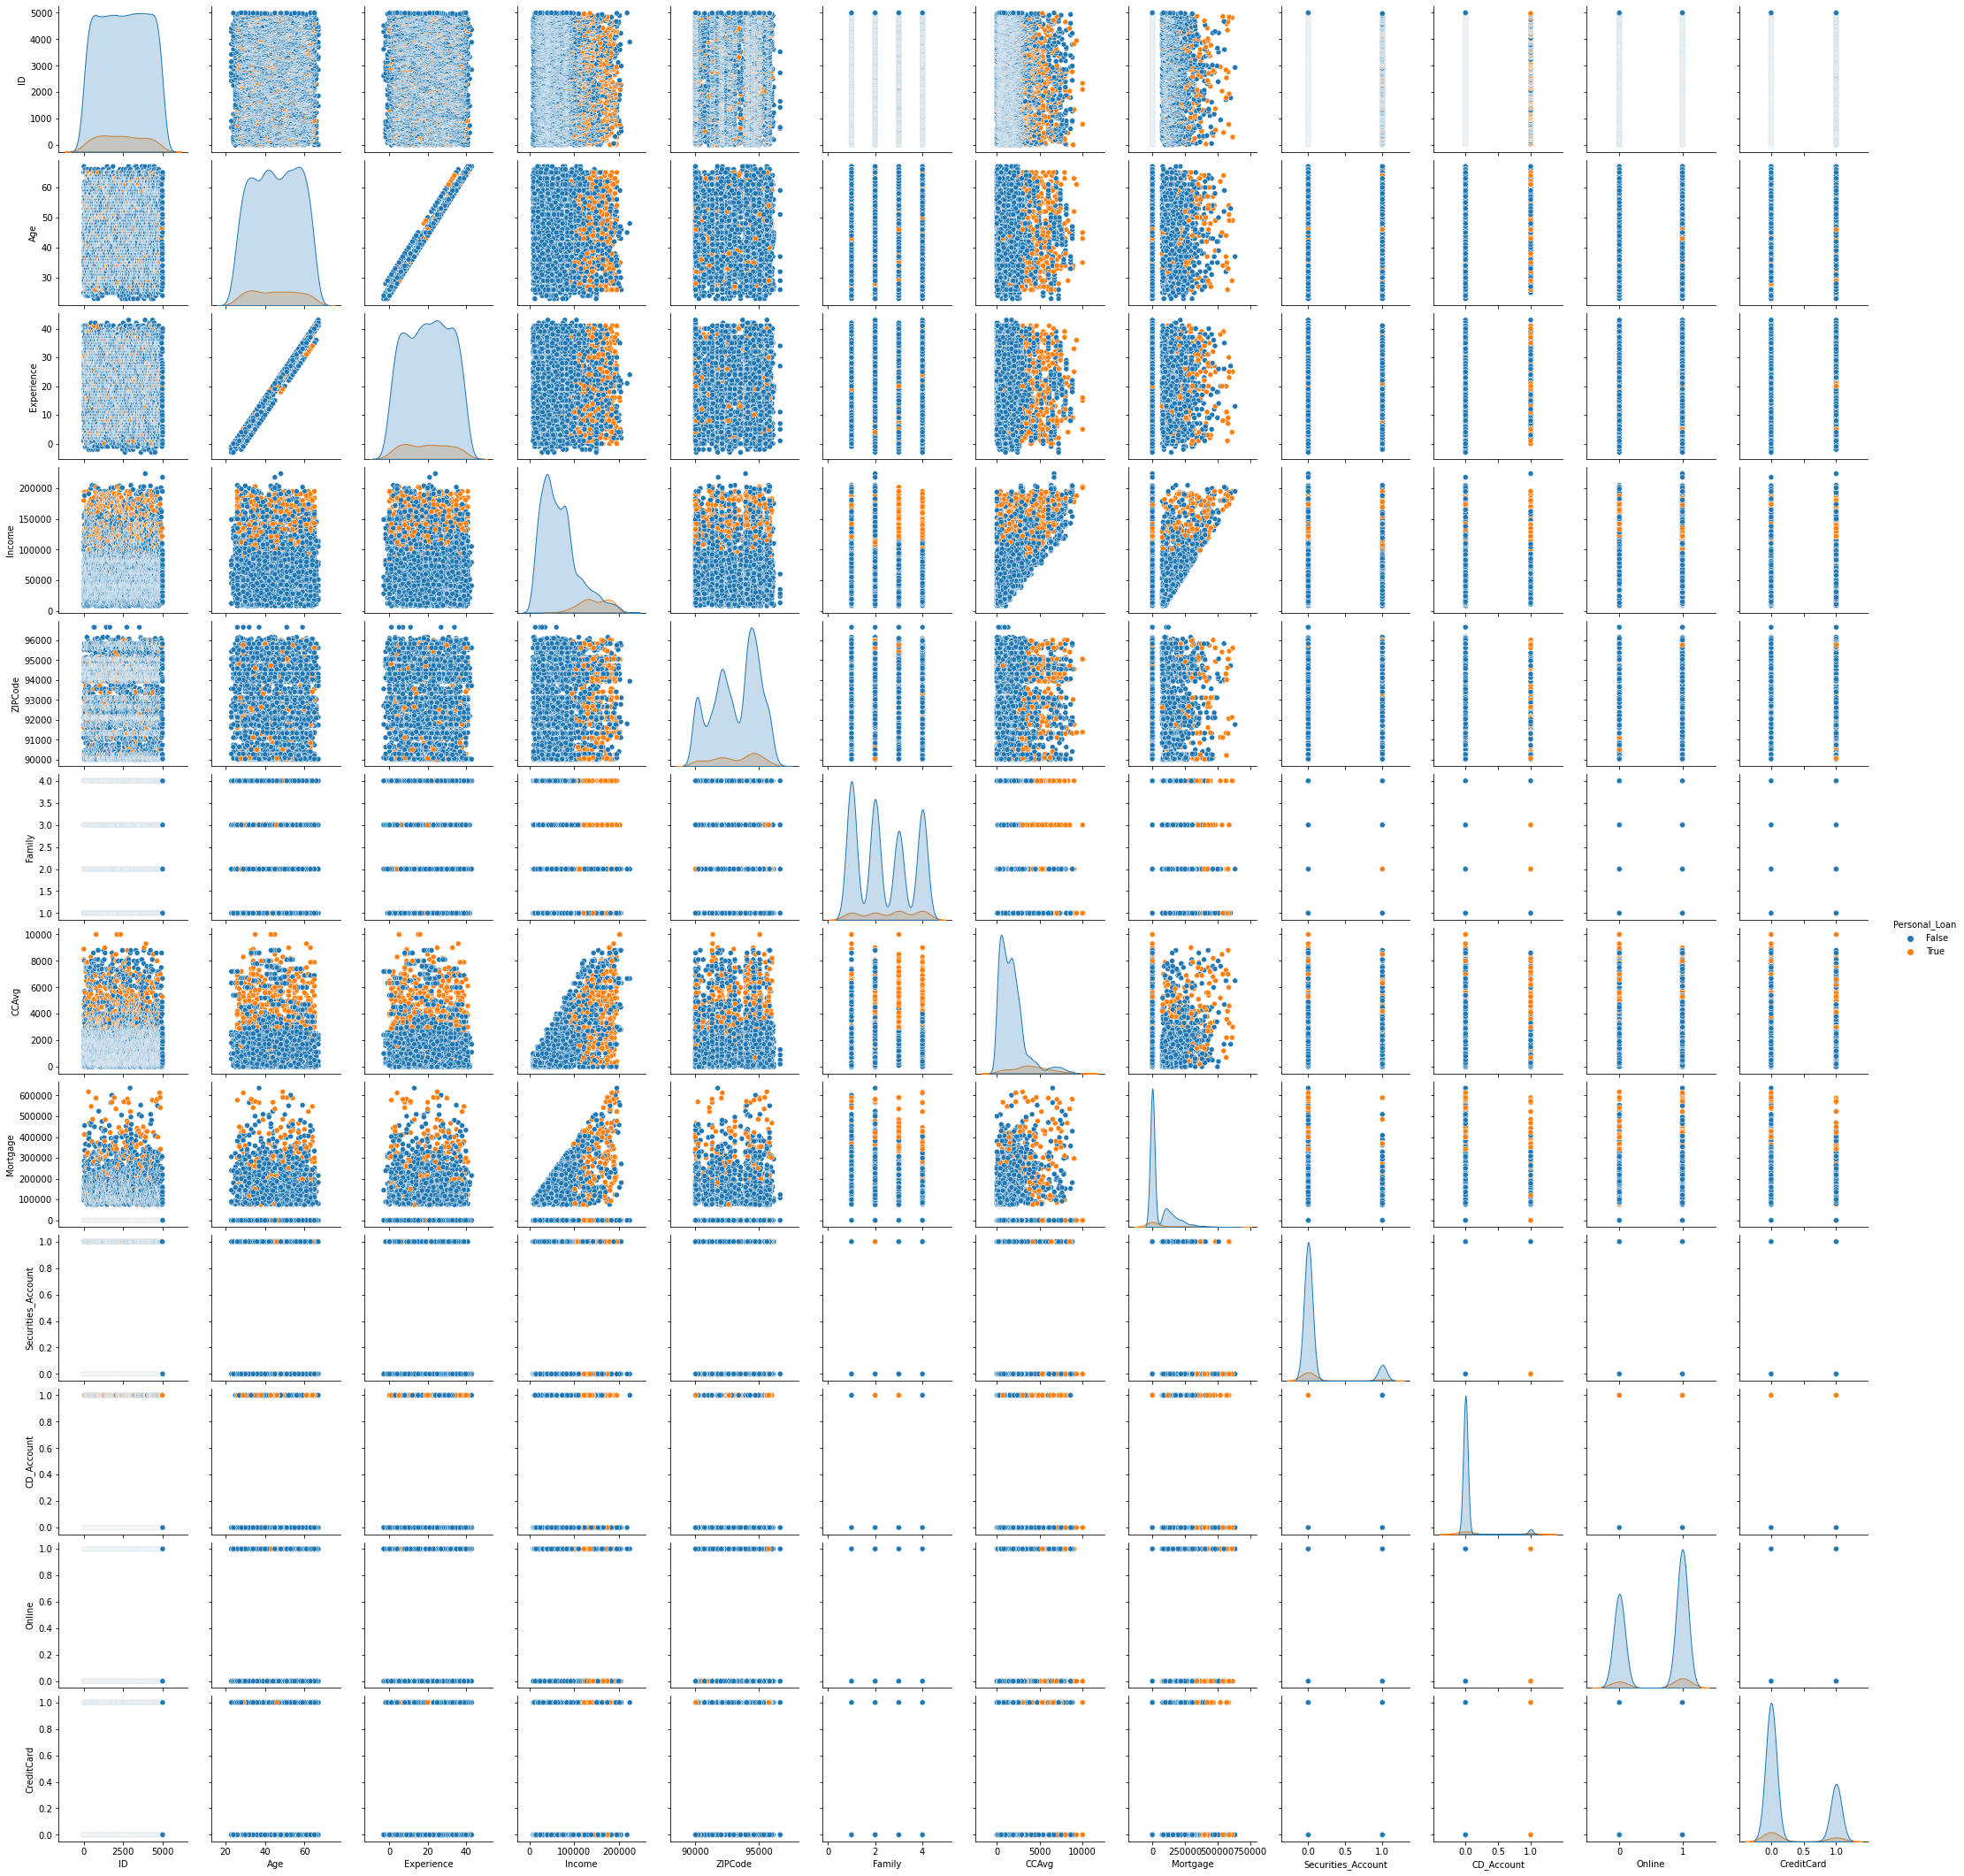

In [37]:
sns.pairplot(data=df, hue="Personal_Loan")
plt.show()

In [38]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

Personal_Loan  False  True   All
Family                          
All             4520   480  5000
4               1088   134  1222
3                877   133  1010
1               1365   107  1472
2               1190   106  1296
------------------------------------------------------------------------------------------------------------------------


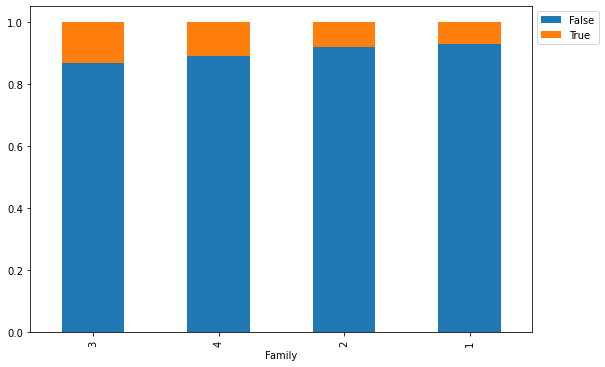

In [39]:
stacked_barplot(df,"Family","Personal_Loan")

- Most personal loans taken out by customers with families of 4 closely followed by families of 3
- Higher percentage of customers with  3 person families have personal loans than 4 person families

Personal_Loan  False  True   All
Education                       
All             4520   480  5000
3               1296   205  1501
2               1221   182  1403
1               2003    93  2096
------------------------------------------------------------------------------------------------------------------------


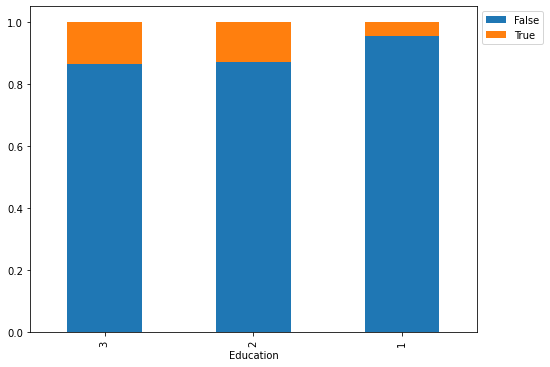

In [40]:
stacked_barplot(df,"Education","Personal_Loan")

- Most personal loans taken by customers with Advanced/Professional education, followed by those with Graduate education. 
- Personal loans increase with level of education

Personal_Loan       False  True   All
Securities_Account                   
All                  4520   480  5000
False                4058   420  4478
True                  462    60   522
------------------------------------------------------------------------------------------------------------------------


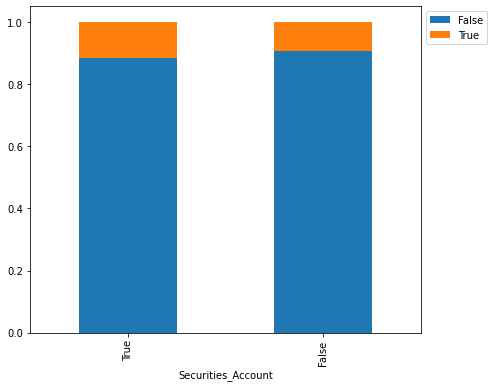

In [41]:
stacked_barplot(df,"Securities_Account","Personal_Loan")

- More customers without a security account took a personal loan
- Higher percentage of customers with a security account took a personal loan

Personal_Loan  False  True   All
CD_Account                      
All             4520   480  5000
False           4358   340  4698
True             162   140   302
------------------------------------------------------------------------------------------------------------------------


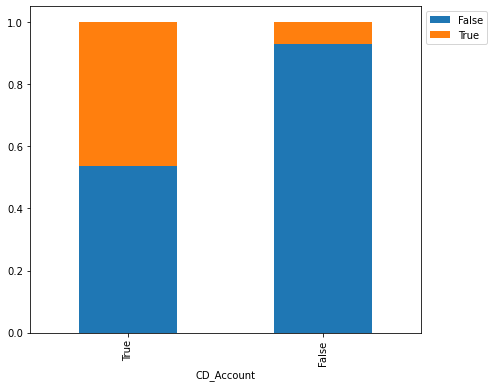

In [42]:
stacked_barplot(df,"CD_Account","Personal_Loan")

- Higher number of customers without CD Accounts have personal loans
- Higher percentage of customers with CD Accounts have personal loans

Personal_Loan  False  True   All
Online                          
All             4520   480  5000
True            2693   291  2984
False           1827   189  2016
------------------------------------------------------------------------------------------------------------------------


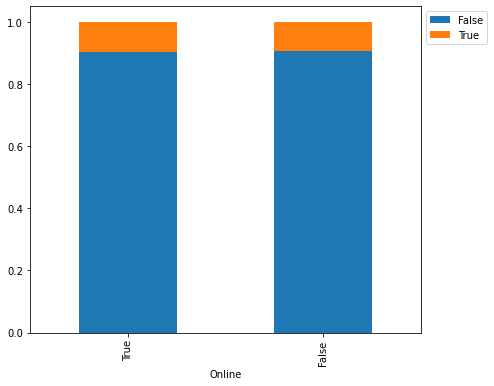

In [43]:
stacked_barplot(df,"Online","Personal_Loan")

- similar percentages between customers who do and dont use internet banking also have personal loans
- higher number of customers who use online banking also have personal loans

Personal_Loan  False  True   All
CreditCard                      
All             4520   480  5000
False           3193   337  3530
True            1327   143  1470
------------------------------------------------------------------------------------------------------------------------


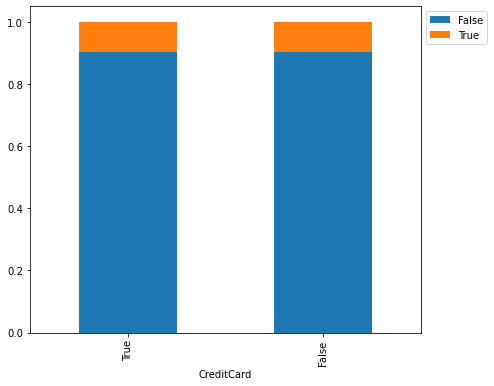

In [44]:
stacked_barplot(df,"CreditCard","Personal_Loan")

- similar percentages between customers who do and dont use have credit cards at other banks also have personal loans
- higher number of customers who dont have credit cards at other banks also have personal loans

### Personal_Loan vs Age, Experience, Income, CCAvg and Mortgage

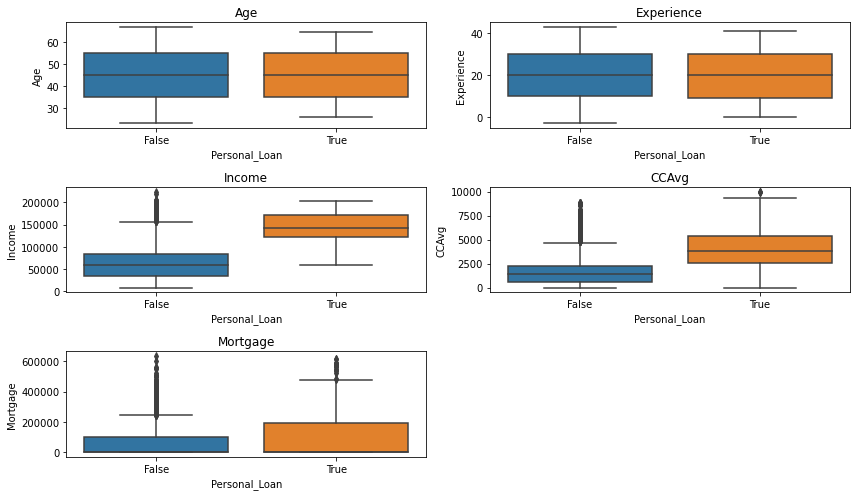

In [45]:
cols = df[
    [
        "Age",
        "Experience",
        "Income",
        "CCAvg",
        "Mortgage",
    ]
].columns.tolist()
plt.figure(figsize=(12, 7))

for i, variable in enumerate(cols):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(df["Personal_Loan"], df[variable])
    plt.tight_layout()
    plt.title(variable)
plt.show()

- customers with share similar distribution on whether do or do not take personal loans among Age groups and years of professional experience. Among both groups the lower quartile is higher and the upper quartile is lower for customers who take personal loans vs those who dont
- Personal loans are taken out by those with higher income
- Personal loans are taken out among the entire range of customers average credit card spending, however most customers who dont take loans tend to have lower spending among both cases there are outliers
- Outliers among both cases for mortgage,at higher mortgage amounts there tend to be more customers with personal loans

### Summary of EDA
**Data Description**

- There are no duplicate values in the dataset
- There are no missing values in the data
- Dependent variable is Personal_Loan which is bool data type
- Most data types are **int64** or **bool**
- 2 columns : County and Education are categories

**Observations from EDA**

* `Age`: There are no outliers in this variable. Average Age of customers is 45 years, age has a wide range from 23 to 67 years.
* `Experience`: The average number of years of professional experience among customers is 20 years. The distribution of Experience is very similar to the distribution of age.

* `Income`: Income is right-skewed. We can see that the third quartile (Q3) is equal to 98,000 which means 75% of customers earn less than 98,000. There is a large difference between the Q3 and the max indicating outliers.

* `Zipcode`: The zipcodes themselves have little statistical meaning, inferences are made off the corresponding counties.

* `Family`: On average most customers have families of 1 or 2 people.

* `CCAvg`: CCAvg is left-skewed. Customers have an average spending of 1938 dollars on their credit cards per month. Customers with an average of 5000 dollars of credit card spending tend to also have personal loans. There is a large difference between the Q3 and the max indicating outliers.

* `Education`: 41.9% of customers have an undergraduate level of education.

* `Mortgage`: Mortgage has a left skew. At higher calues of house mortgage customers tend to have personal loans.There is a large difference between the Q3 and the max indicating outliers.

* `Personal_Loan`: Our independent variable. Only 9.6% of customers accepted a personal loan during the last campaign.

* `Securities_Account`: 89.6% of customers do not have a security loan with the bank.

* `CD_Account`: 94% of customers do not have a certificate of deposit account with the bank.

* `Online`: 59.7% of customers use internet banking facilities.

* `CreditCard`: 70.6% of customers do not use a credit card issued by other banks.

* `County`: 21.9% of customers are from Los Angeles county followed by 11.4% at San Diego County, 11.3% at Santa Clara County and 10% at Alemeda County.

* `Personal_Loan vs Other variables`:
    * Customers with families of 3 or 4 tend to have personal loans compared to the 1 or 2.
    * As customer education level increases the  number of customers with personal loans tends to increase as well
    * The percentage of customers with personal loans are similar for CreditCard and Online variables. (not similar to eachother)
    * Customers share similar distribution on whether do or do not take personal loans among Age groups and years of professional experience. Among both groups the lower quartile is higher and the upper quartile is lower for customers who take personal loans vs those who dont
    * Customer with higher income tend to have personal loans

* Customers with higher income, mortgage value, average credit card spending and have bigger families tend to be the population that has personal loans

# Data Pre-processing

### Outlier & Missing Value treatment

* Data indicates so far that higher Income, Mortgage and CCAvg is where the personal loans are, these values are outliers based on the boxplots. They are simply large values and are important to keep within the Data.

* A large amount of Mortgage outliers can be explained by the multitude of people without mortgages, it is for this reason we are not applying missing data treatment to Mortgage either as these are important points in the dataset

### Data Engineering

In [46]:
X = df.drop('Personal_Loan', axis=1)
y = df['Personal_Loan']

In [47]:
#ID adds no statistical value and isnt needed
X.drop('ID',axis=1,inplace=True)
#Zipcode isn't really a numerical value and its information has been translated into county
X.drop('ZIPCode',axis=1,inplace=True)

#### Creating dummy variables

In [48]:
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)

### Splitting the Data

In [49]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
x_train.head()

Age  Experience  Income  Family  CCAvg  Mortgage  Securities_Account  \
1334   47          22   35000       2   1300         0               False   
4768   38          14   39000       1   2000         0               False   
65     59          35  131000       1   3800         0               False   
177    29           3   65000       4   1800    244000               False   
4489   39          13   21000       3    200         0               False   

      CD_Account  Online  CreditCard  Education_2  Education_3  \
1334       False    True       False            0            0   
4768       False    True       False            1            0   
65         False    True        True            0            0   
177        False   False       False            1            0   
4489       False    True       False            1            0   

      County_Butte County  County_Contra Costa County  \
1334                    0                           0   
4768                    0                           0   
65                      0                           0   
177                     0                           0   
4489                    0                           0   

      County_El Dorado County  County_Fresno County  County_Humboldt County  \
1334                        0                     0                       0   
4768                        0                     0                       0   
65                          0                     0                       0   
177                         0                     0                       0   
4489                        0                     0                       1   

      County_Imperial County  County_Kern County  County_Lake County  \
1334                       0                   0                   0   
4768                       0                   0                   0   
65                         0                   0                   0   
177                        0                   0                   0   
4489                       0                   0                   0   

      County_Los Angeles County  County_Marin County  County_Mendocino County  \
1334                          0                    0                        0   
4768                          0                    0                        0   
65                            0                    0                        0   
177                           0                    0                        0   
4489                          0                    0                        0   

      County_Merced County  County_Monterey County  County_Napa County  \
1334                     0                       0                   0   
4768                     0                       0                   0   
65                       0                       0                   0   
177                      0                       0                   0   
4489                     0                       0                   0   

      County_Orange County  County_Placer County  County_Riverside County  \
1334                     0                     0                        0   
4768                     0                     0                        0   
65                       0                     0                        0   
177                      0                     0                        0   
4489                     0                     0                        0   

      County_Sacramento County  County_San Benito County  \
1334                         0                         0   
4768                         0                         0   
65                           0                         0   
177                          0                         0   
4489                         0                         0   

      County_San Bernardino County  County_San Diego County  \
1334                             0                        0   
4768   

In [50]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 3500
Number of rows in test data = 1500


In [51]:
print("Shape of Training set : ", x_train.shape)
print("Shape of test set : ", x_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3500, 49)
Shape of test set :  (1500, 49)
Percentage of classes in training set:
False    0.905429
True     0.094571
Name: Personal_Loan, dtype: float64
Percentage of classes in test set:
False    0.900667
True     0.099333
Name: Personal_Loan, dtype: float64


Similar distribution of independent variable in train and test sets indicates a good split.
Row distribution in X indicates a 70 30 split.

# Building Logistic Regression Model

In [52]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn

def model_performance_classification_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    Function to compute different metrics, based on the threshold specified, to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # predicting using the independent variables
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    pred = np.round(pred_thres)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [53]:
# defining a function to plot the confusion_matrix of a classification model built using sklearn
def confusion_matrix_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix, based on the threshold specified, with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    y_pred = np.round(pred_thres)

    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")


### Logistic Regression

In [54]:
lgr = LogisticRegression(solver="newton-cg", random_state=1)
model = lgr.fit(x_train, y_train)

### Finding the coefficients

In [55]:
coef_df = pd.DataFrame(
    np.append(lgr.coef_, lgr.intercept_),
    index=x_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
coef_df.T

Age  Experience    Income    Family     CCAvg  \
Coefficients -0.335796    0.331864  0.000039  0.507625  0.000128   

                  Mortgage  Securities_Account  CD_Account    Online  \
Coefficients  6.917198e-07           -0.015577    1.155857 -0.208035   

              CreditCard  Education_2  Education_3  County_Butte County  \
Coefficients   -0.264431     1.334524     1.533987            -0.019544   

              County_Contra Costa County  County_El Dorado County  \
Coefficients                    0.060479                -0.035399   

              County_Fresno County  County_Humboldt County  \
Coefficients              0.012003               -0.040759   

              County_Imperial County  County_Kern County  County_Lake County  \
Coefficients               -0.001504             0.11389           -0.001772   

              County_Los Angeles County  County_Marin County  \
Coefficients                   -0.07241             0.053517   

              County_Mendocino County  County_Merced County  \
Coefficients                -0.006839             -0.014539   

              County_Monterey County  County_Napa County  \
Coefficients                0.014099           -0.001027   

              County_Orange County  County_Placer County  \
Coefficients             -0.115232              0.031755   

              County_Riverside County  County_Sacramento County  \
Coefficients                 0.057017                  0.060065   

              County_San Benito County  County_San Bernardino County  \
Coefficients                 -0.014516                      -0.11266   

              County_San Diego County  County_San Francisco County  \
Coefficients                 0.016918                     0.015123   

              County_San Joaquin County  County_San Luis Obispo County  \
Coefficients                   0.002517                      -0.029322   

              County_San Mateo County  County_Santa Barbara County  \
Coefficients                -0.211103                    -0.007236   

              County_Santa Clara County  County_Santa Cruz County  \
Coefficients                   0.068842                  0.037399   

              County_Shasta County  County_Siskiyou County  \
Coefficients             -0.010601               -0.003495   

              County_Solano County  County_Sonoma County  \
Coefficients              0.015724              0.058889   

              County_Stanislaus County  County_Trinity County  \
Coefficients                  -0.00836              -0.007388   

              County_Tuolumne County  County_Ventura County  \
Coefficients               -0.005949               0.061353   

              County_Yolo County  Intercept  
Coefficients           -0.069051  -0.176816

* Coefficients of Age, Securities_Account, Online and CreditCard are negative, increase in these would lead to a decrease in the chances of a customer having a Personal loan.
* Coefficients  of Experience, Income, Family CCAvg,CD_Account and all levels of education have a positive coefficient, increase in these would lead to an increase in chance of a customer having a personal loan
    * CD_Account coefficient very high compared to the rest
    * Income, CCAVG and Mortgage while positive are very small numbers
* Among counties about 22 of them had negative coefficients, leaving 17 with positive correlations

#### Odds from coefficients

In [56]:
# converting coefficients to odds
odds = np.exp(lgr.coef_[0])

# finding the percentage change
perc_change_odds = (np.exp(lgr.coef_[0]) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=x_train.columns).T

Age  Experience    Income     Family     CCAvg  Mortgage  \
Odds          0.714769    1.393564  1.000039   1.661340  1.000128  1.000001   
Change_odd% -28.523134   39.356374  0.003888  66.134018  0.012772  0.000069   

             Securities_Account  CD_Account     Online  CreditCard  \
Odds                   0.984543    3.176744   0.812179    0.767643   
Change_odd%           -1.545659  217.674376 -18.782148  -23.235718   

             Education_2  Education_3  County_Butte County  \
Odds            3.798188     4.636627             0.980646   
Change_odd%   279.818751   363.662743            -1.935389   

             County_Contra Costa County  County_El Dorado County  \
Odds                           1.062345                 0.965220   
Change_odd%                    6.234519                -3.478004   

             County_Fresno County  County_Humboldt County  \
Odds                     1.012075                0.960060   
Change_odd%              1.207482               -3.993978   

             County_Imperial County  County_Kern County  County_Lake County  \
Odds                       0.998497            1.120629            0.998229   
Change_odd%               -0.150284           12.062875           -0.177059   

             County_Los Angeles County  County_Marin County  \
Odds                          0.930150             1.054975   
Change_odd%                  -6.985049             5.497512   

             County_Mendocino County  County_Merced County  \
Odds                        0.993184              0.985566   
Change_odd%                -0.681560             -1.443401   

             County_Monterey County  County_Napa County  County_Orange County  \
Odds                       1.014198            0.998973              0.891159   
Change_odd%                1.419845           -0.102657            -10.884089   

             County_Placer County  County_Riverside County  \
Odds                     1.032264                 1.058674   
Change_odd%              3.226411                 5.867415   

             County_Sacramento County  County_San Benito County  \
Odds                         1.061906                  0.985589   
Change_odd%                  6.190560                 -1.441139   

             County_San Bernardino County  County_San Diego County  \
Odds                             0.893454                 1.017062   
Change_odd%                    -10.654585                 1.706221   

             County_San Francisco County  County_San Joaquin County  \
Odds                            1.015238                   1.002520   
Change_odd%                     1.523811                   0.251974   

             County_San Luis Obispo County  County_San Mateo County  \
Odds                              0.971104                 0.809690   
Change_odd%                      -2.889597               -19.030958   

             County_Santa Barbara County  County_Santa Clara County  \
Odds                            0.992790                   1.071267   
Change_odd%                    -0.721003                   7.126726   

             County_Santa Cruz County  County_Shasta County  \
Odds                         1.038107              0.989455   
Change_odd%                  3.810721             -1.054528   

             County_Siskiyou County  County_Solano County  \
Odds                       0.996511              1.015848   
Change_odd%               -0.348852              1.584821   

             County_Sonoma County  County_Stanislaus County  \
Odds                     1.060657                  0.991675   
Change_odd%              6.065744                 -0.832535   

             County_Trinity County  County_Tuolumne County  \
Odds                      0.992639                0.994069   
Change_odd%              -0.736066               -0.593121   

             County_Ventura County  County_Yolo County  
Odds                      1.063274            0.933279  
Change_odd%               6.

### Coefficient Interpretation
* `Age`: Holding all other features constant a 1 unit change in Age will decrease the odds of a customer having a personal loan by 0.71 times or a 28.5% decrease in odds of having a personal loan.
* `Experience`: Holding all other features constant a 1 unit change in Experience will increase the odds of a customer having a personal loan by 1.4 times or a 39.5% increase in odds of having a personal loan.
* `Income`: Holding all other features constant a 1 unit change in Income will increase the odds of a customer having a personal loan by 1 time or a 0.0039% increase in odds of having a personal loan.
* `Family`: Holding all other features constant a 1 unit change in Family will increase the odds of a customer having a personal loan by 1.66 times or a 66.1% increase in odds of having a personal loan.
* `CCAvg`: Holding all other features constant a 1 unit change in CCAvg will increase the odds of a customer having a personal loan by 1 time or a 0.013% increase in odds of having a personal loan.
* `Mortgage`: Holding all other features constant a 1 unit change in Mortgage will increase the odds of a customer having a personal loan by 1 time or a 0.000069% increase in odds of having a personal loan.
* `Securities_Account`: Holding all other features constant a 1 unit change in Securities_Account will decrease the odds of a customer having a personal loan by 0.98 times or a 1.5% decrease in odds of having a personal loan.
* `CD_Account`: Holding all other features constant a 1 unit change in CD_Account will increase the odds of a customer having a personal loan by 3.2 times or a 217.7% increase in odds of having a personal loan.
* `Online`: Holding all other features constant a 1 unit change in Online will decrease the odds of a customer having a personal loan by 0.81 times or a 18.8% decrease in odds of having a personal loan.
* `CreditCard`: Holding all other features constant a 1 unit change in CreditCard will decrease the odds of a customer having a personal loan by 0.77 times or a 23.2% decrease in odds of having a personal loan.
* `Education`: Holding all other features constant a 1 unit change in Education_2 will increase the odds of a customer having a personal loan by 3.8 times or a 279.8% increase in odds of having a personal loan. A 1 unit change in Education_3 will increase the odds of a customer having a personal loan by 4.6 times or a 363.7% increase in odds of having a personal loan.
* `County`: The highest and lowest effect counties, holding all other features constant a 1 unit change in Kern_County will increase the odds of a customer having a personal loan by 1.12 times or a 12.06% increase in odds of having a personal loan. While a 1 unit change in San Mateo_County will decrease the odds of a customer having a personal loan by 0.81 times or a 19.03% decrease in odds of having a personal loan

### Checking model performance on training set

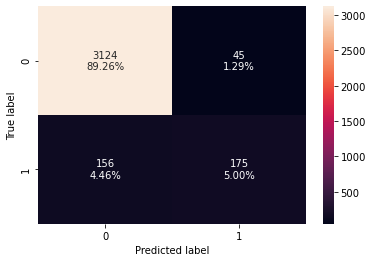

In [57]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(lgr, x_train, y_train)

In [58]:
log_reg_model_train_perf = model_performance_classification_sklearn_with_threshold(
    lgr, x_train, y_train
)

print("Training performance:")
log_reg_model_train_perf

Training performance:


Accuracy    Recall  Precision        F1
0  0.942571  0.528701   0.795455  0.635209

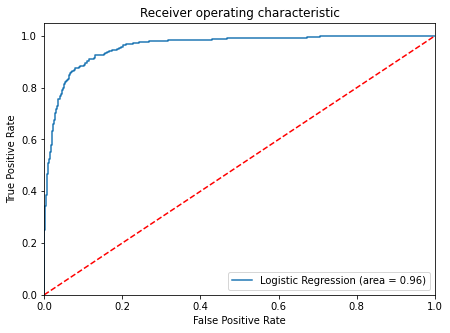

In [59]:
logit_roc_auc_train = roc_auc_score(y_train, lgr.predict_proba(x_train)[:, 1])
fpr, tpr, thresholds = roc_curve(y_train, lgr.predict_proba(x_train)[:, 1])
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

- Logistic Regression model is giving a good performance on the training set but the recall is low
- Best metric for model performance is recall for the best predictions as we are trying to accurately predict which customers will buy a personal loan and which segment of customers should be targets

### Model Performance improvement

#### Optimal threshold using AUC-ROC curve

In [60]:
fpr, tpr, thresholds = roc_curve(y_train, lgr.predict_proba(x_train)[:, 1])

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.15797438947384854


#### checking new performance on training set

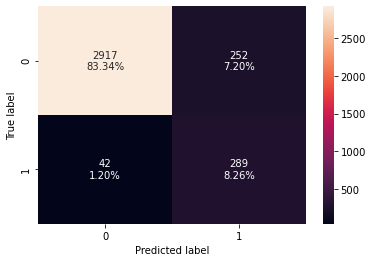

In [61]:
confusion_matrix_sklearn_with_threshold(
    lgr, x_train, y_train, threshold=optimal_threshold_auc_roc
)

In [62]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_sklearn_with_threshold(
    lgr, x_train, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


Accuracy    Recall  Precision        F1
0     0.916  0.873112   0.534196  0.662844

- Significant performance improvement on training set
- Model is giving a recall of 0.87

Checking Precision-Recall curve for better threshold

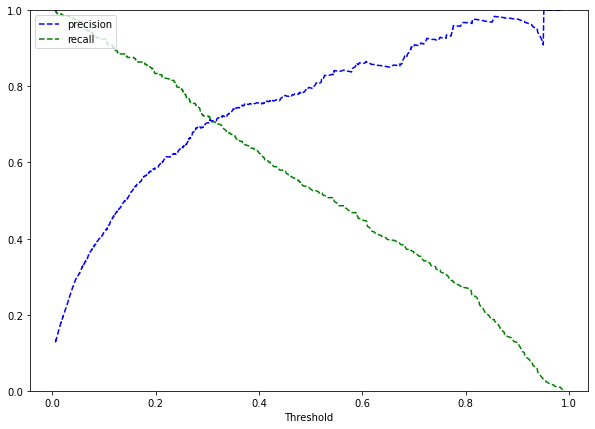

In [63]:
y_scores = lgr.predict_proba(x_train)[:, 1]
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

* At threshold around 0.31 we get equal precision and recall but taking a step back and taking a value around 0.28 will give high recall and good precision

In [64]:
# setting the threshold
optimal_threshold_curve = 0.28

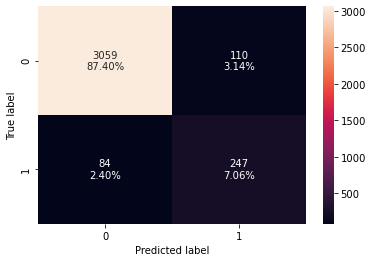

In [65]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lgr, x_train, y_train, threshold=optimal_threshold_curve
)

In [66]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_sklearn_with_threshold(
    lgr, x_train, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


Accuracy    Recall  Precision        F1
0  0.944571  0.746224   0.691877  0.718023

- Recall has improved compared to initial model
- F1 score has improved compared to initial model
- Model with threshold as 0.16 was giving better precision

### Model Performance Summary

In [67]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.16 Threshold",
    "Logistic Regression-0.28 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Logistic Regression sklearn  Logistic Regression-0.16 Threshold  \
Accuracy                      0.942571                            0.916000   
Recall                        0.528701                            0.873112   
Precision                     0.795455                            0.534196   
F1                            0.635209                            0.662844   

           Logistic Regression-0.28 Threshold  
Accuracy                             0.944571  
Recall                               0.746224  
Precision                            0.691877  
F1                                   0.718023

## Test set Performance

### Default Threshold

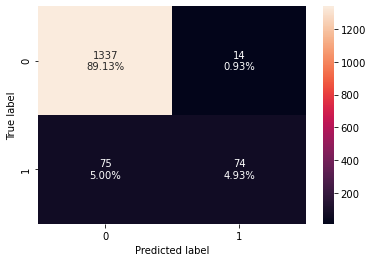

In [68]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(lgr, x_test, y_test)

In [69]:
log_reg_model_test_perf = model_performance_classification_sklearn_with_threshold(
    lgr, x_test, y_test
)

print("Test set performance:")
log_reg_model_test_perf

Test set performance:


Accuracy    Recall  Precision        F1
0  0.940667  0.496644   0.840909  0.624473

### ROC-AUC

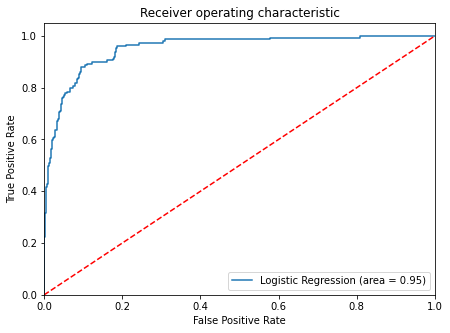

In [70]:
logit_roc_auc_test = roc_auc_score(y_test, lgr.predict_proba(x_test)[:, 1])
fpr, tpr, thresholds = roc_curve(y_test, lgr.predict_proba(x_test)[:, 1])
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_test)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

### Model with threshold of 0.16

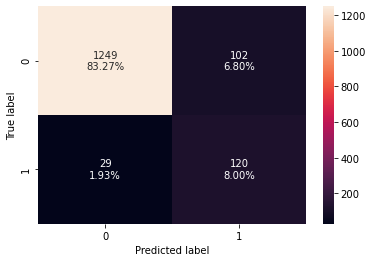

In [71]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lgr, x_test, y_test, threshold=optimal_threshold_auc_roc
)

In [72]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_sklearn_with_threshold(
    lgr, x_test, y_test, threshold=optimal_threshold_auc_roc
)
print("Test set performance:")
log_reg_model_test_perf_threshold_auc_roc

Test set performance:


Accuracy    Recall  Precision      F1
0  0.912667  0.805369   0.540541  0.6469

### Model with threshold of 0.28

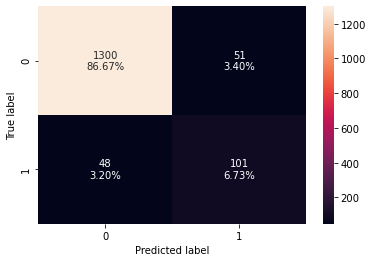

In [73]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lgr, x_test, y_test, threshold=optimal_threshold_curve
)

In [74]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_sklearn_with_threshold(
    lgr, x_test, y_test, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


Accuracy    Recall  Precision        F1
0     0.934  0.677852   0.664474  0.671096

In [75]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.16 Threshold",
    "Logistic Regression-0.28 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Logistic Regression sklearn  Logistic Regression-0.16 Threshold  \
Accuracy                      0.942571                            0.916000   
Recall                        0.528701                            0.873112   
Precision                     0.795455                            0.534196   
F1                            0.635209                            0.662844   

           Logistic Regression-0.28 Threshold  
Accuracy                             0.944571  
Recall                               0.746224  
Precision                            0.691877  
F1                                   0.718023

In [76]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.16 Threshold",
    "Logistic Regression-0.28 Threshold",
]

print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


Logistic Regression sklearn  Logistic Regression-0.16 Threshold  \
Accuracy                      0.940667                            0.912667   
Recall                        0.496644                            0.805369   
Precision                     0.840909                            0.540541   
F1                            0.624473                            0.646900   

           Logistic Regression-0.28 Threshold  
Accuracy                             0.934000  
Recall                               0.677852  
Precision                            0.664474  
F1                                   0.671096

- The 0.16 threshold had the highest recall at the cost of precision
- The 0.28 threshold has a balance of recall and precision and and improved f1 score over the default and 0.16 thresholds. 

## Build Decision Tree Model

In [77]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [78]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [79]:
model_tree = DecisionTreeClassifier(criterion="gini", random_state=1)
model_tree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1)

### Checking model performance on training set

In [80]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model_tree, x_train, y_train
)
decision_tree_perf_train

Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

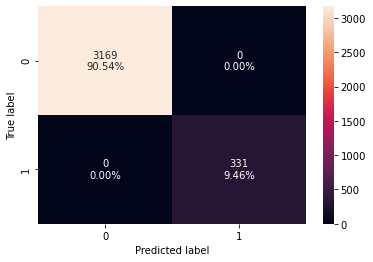

In [81]:
confusion_matrix_sklearn(model_tree, x_train, y_train)

### Checking model performance on testing set

In [82]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model_tree, x_test, y_test
)
decision_tree_perf_test

Accuracy    Recall  Precision        F1
0     0.984  0.885906    0.94964  0.916667

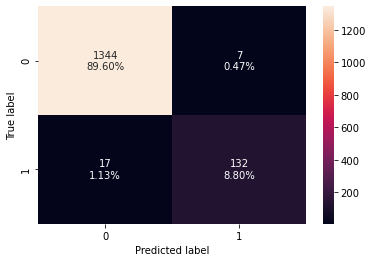

In [83]:
confusion_matrix_sklearn(model_tree, x_test, y_test)

- Perfect scores on training indicates that the model is overfitting
- Recall, Prevision and F1 scores are , howver, very high on the test set

## Decision Tree Visualization

In [84]:
column_names = list(X.columns)
feature_names = column_names
print(feature_names)

['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'Education_2', 'Education_3', 'County_Butte County', 'County_Contra Costa County', 'County_El Dorado County', 'County_Fresno County', 'County_Humboldt County', 'County_Imperial County', 'County_Kern County', 'County_Lake County', 'County_Los Angeles County', 'County_Marin County', 'County_Mendocino County', 'County_Merced County', 'County_Monterey County', 'County_Napa County', 'County_Orange County', 'County_Placer County', 'County_Riverside County', 'County_Sacramento County', 'County_San Benito County', 'County_San Bernardino County', 'County_San Diego County', 'County_San Francisco County', 'County_San Joaquin County', 'County_San Luis Obispo County', 'County_San Mateo County', 'County_Santa Barbara County', 'County_Santa Clara County', 'County_Santa Cruz County', 'County_Shasta County', 'County_Siskiyou County', 'County_Solano County', 'County_Sonoma County', 

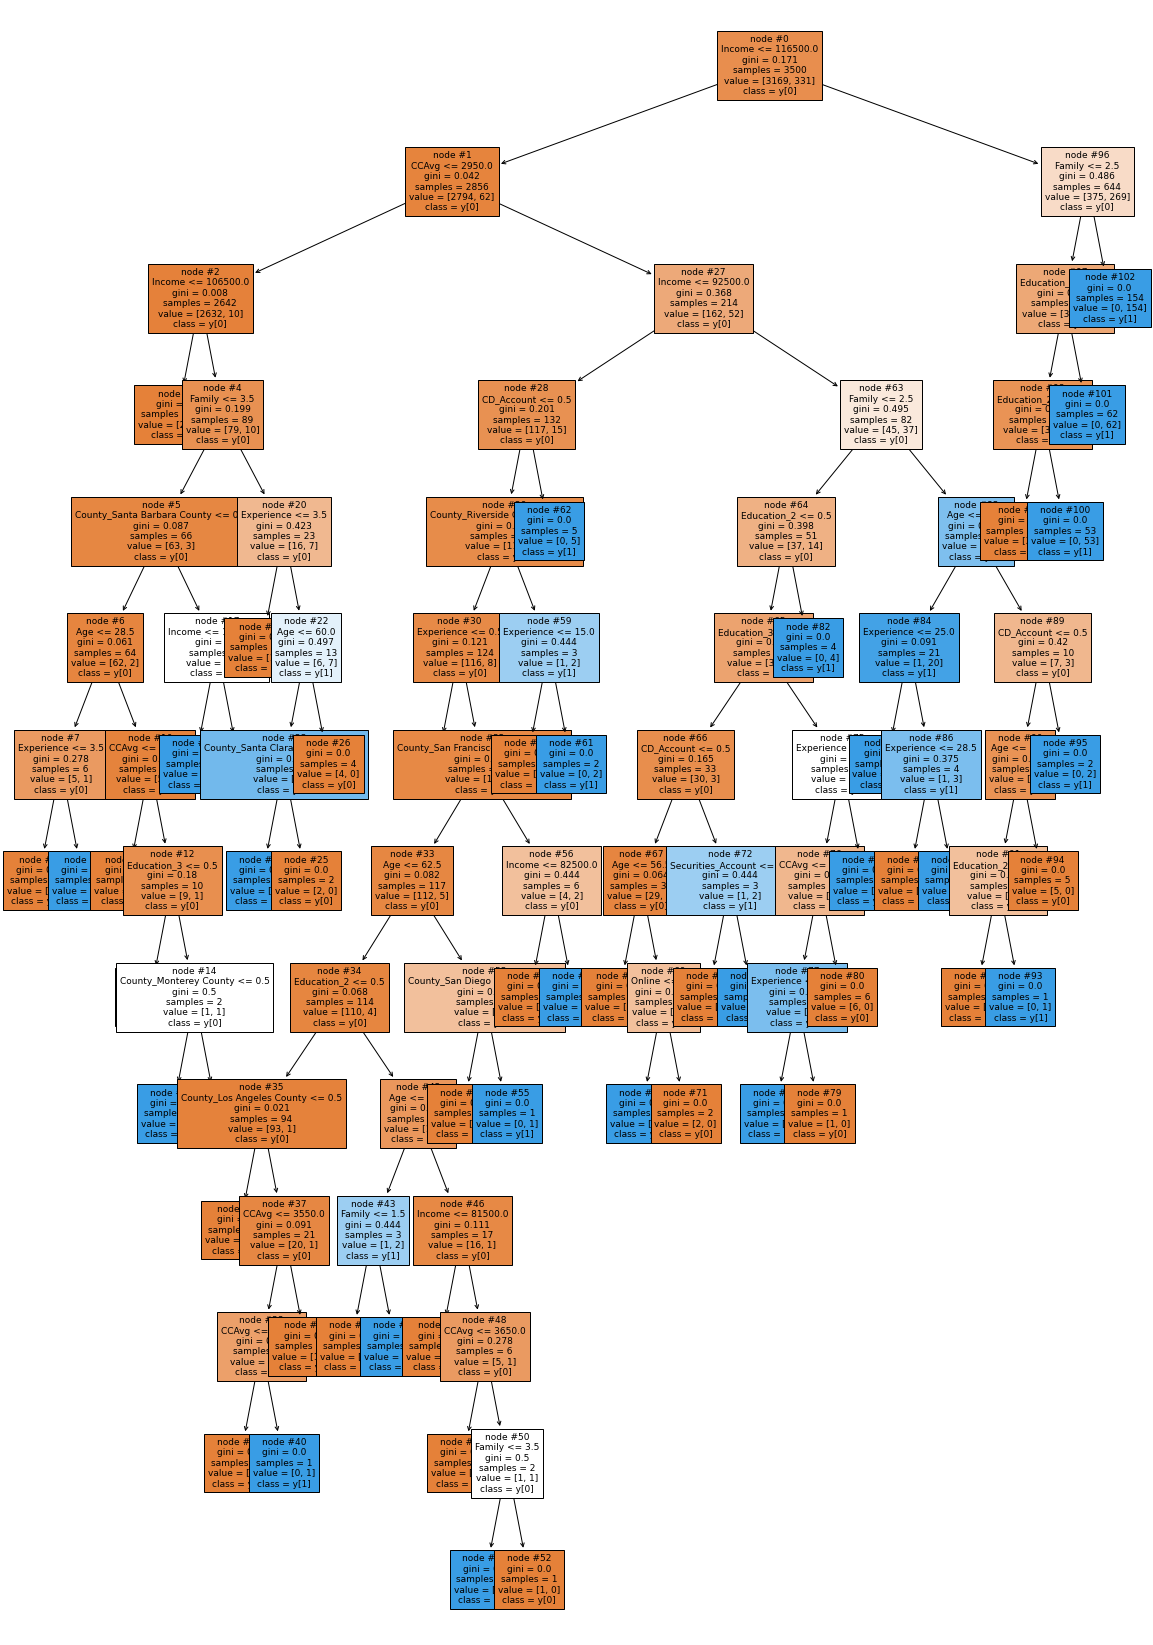

In [85]:
plt.figure(figsize=(20, 30))

out = tree.plot_tree(
    model_tree,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

### Decision tree importances

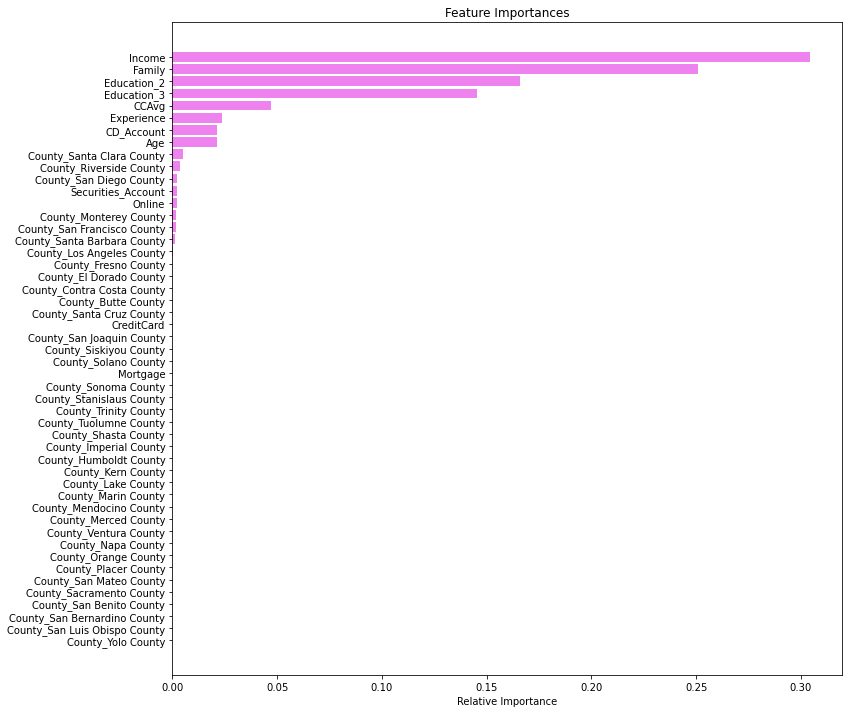

In [86]:
importances = model_tree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- The top 3 important features are Income, Family and Education

## GridSearch tuning our tree model

In [87]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from

parameters = {
    "max_depth": [np.arange(2, 50, 1), None],
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    "min_impurity_decrease": [0.000001, 0.00001, 0.0001],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_impurity_decrease=1e-06,
                       random_state=1)

#### Checking performance on training set

In [88]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, x_train, y_train
)
decision_tree_tune_perf_train

Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

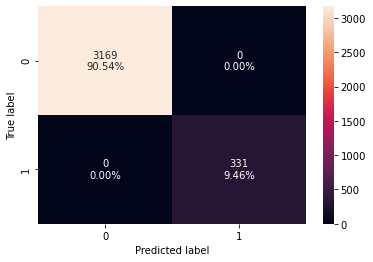

In [89]:
confusion_matrix_sklearn(estimator, x_train, y_train)

- still have similar issue of overfitting on training set

#### Checking performance on testing set

In [90]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, x_test, y_test
)

decision_tree_tune_perf_test

Accuracy    Recall  Precision        F1
0  0.985333  0.885906   0.963504  0.923077

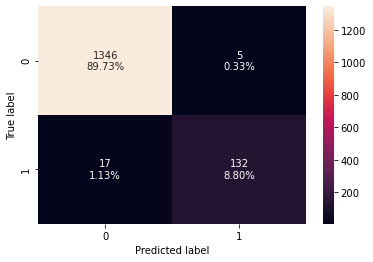

In [91]:
confusion_matrix_sklearn(estimator, x_test, y_test)

- slight improvement on precision and f1 scores
- Recall similar to initial model
- Tree has become simpler

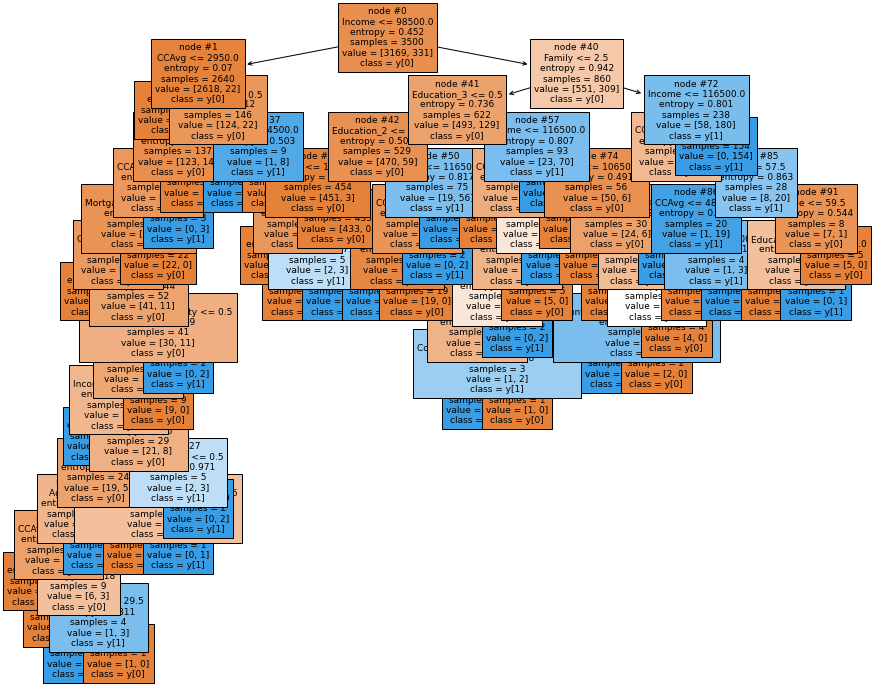

In [92]:
plt.figure(figsize=(15, 12))

tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
plt.show()

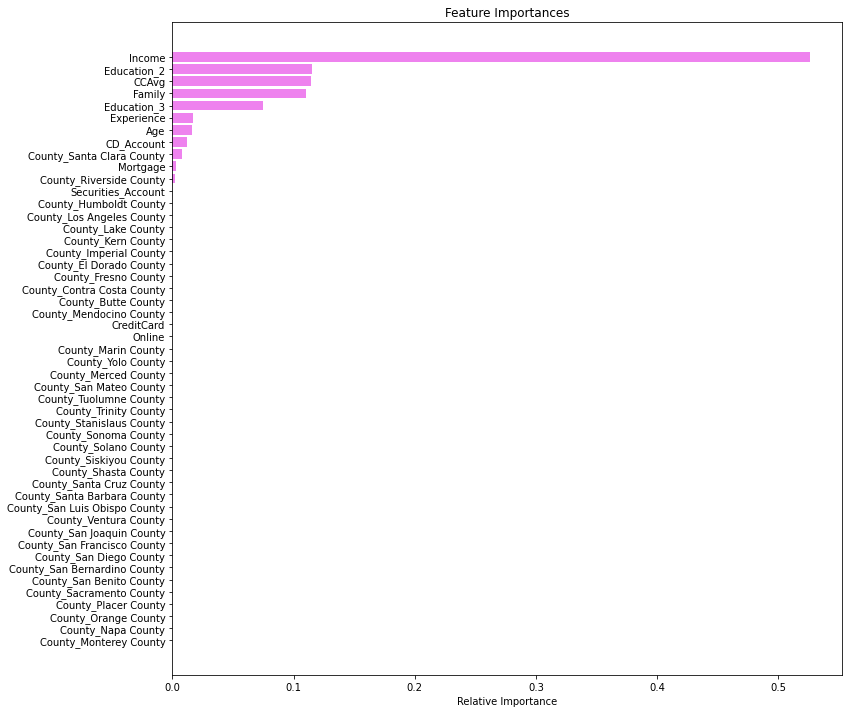

In [93]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- Income, Education and CCAvg are the most important features with pre-pruning.

## Cost Complexity Pruning

In [94]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [95]:
pd.DataFrame(path)

ccp_alphas  impurities
0     0.000000    0.000000
1     0.000179    0.000538
2     0.000187    0.001099
3     0.000188    0.001665
4     0.000250    0.002165
5     0.000269    0.003240
6     0.000272    0.003784
7     0.000276    0.004336
8     0.000326    0.005968
9     0.000381    0.006349
10    0.000381    0.006730
11    0.000429    0.007158
12    0.000514    0.008700
13    0.000607    0.009307
14    0.000625    0.009932
15    0.000700    0.010632
16    0.000771    0.011403
17    0.000800    0.012203
18    0.000811    0.016260
19    0.000940    0.017200
20    0.001305    0.018505
21    0.001647    0.020153
22    0.002333    0.022486
23    0.002407    0.024893
24    0.003294    0.028187
25    0.006473    0.034659
26    0.025146    0.084951
27    0.039216    0.124167
28    0.047088    0.171255

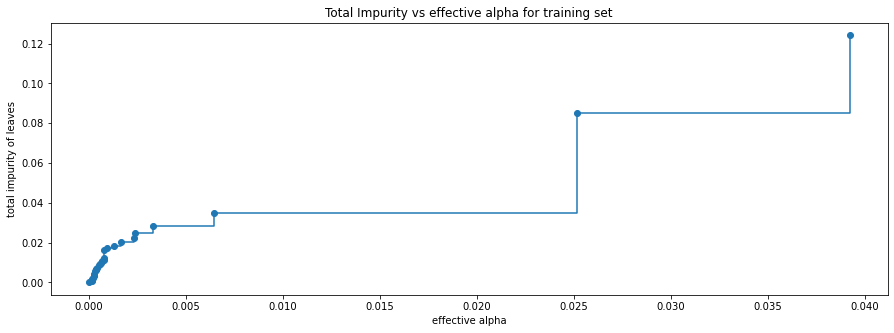

In [96]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

- check for effective alphas to prune the tree

In [97]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.04708834100596766


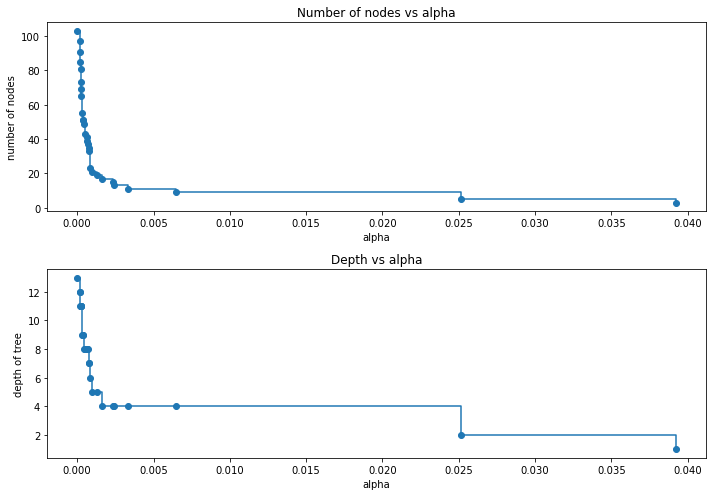

In [98]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

## Recall vs Alpha for training and testing set

In [99]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(x_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

In [100]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(x_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

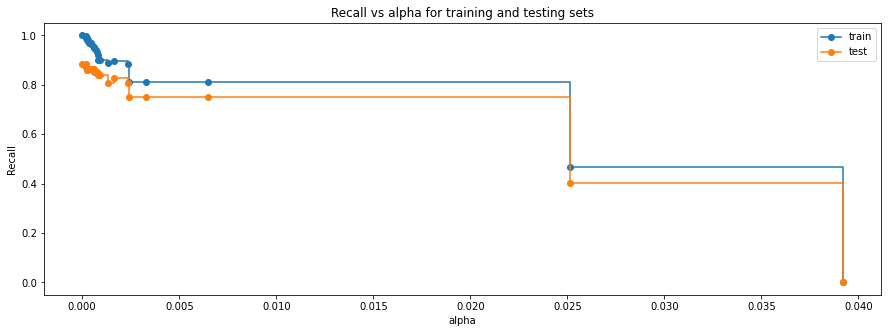

In [101]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [102]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(random_state=1)


- no ccp alpha chosen default parameters are preferred so no new tests need to be done

In [103]:
decision_tree_postpruned_perf_train = model_performance_classification_sklearn(
    best_model, x_train, y_train
)
decision_tree_postpruned_perf_train

Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

In [104]:
decision_tree_postpruned_perf_test = model_performance_classification_sklearn(
    best_model, x_test, y_test
)
decision_tree_postpruned_perf_test

Accuracy    Recall  Precision        F1
0     0.984  0.885906    0.94964  0.916667

## Comparing all the decision tree models

In [105]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_postpruned_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Decision Tree sklearn  Decision Tree (Pre-Pruning)  \
Accuracy                     1.0                          1.0   
Recall                       1.0                          1.0   
Precision                    1.0                          1.0   
F1                           1.0                          1.0   

           Decision Tree (Post-Pruning)  
Accuracy                            1.0  
Recall                              1.0  
Precision                           1.0  
F1                                  1.0

In [106]:
# test performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_postpruned_perf_test.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_train_comp_df

Test set performance comparison:


Decision Tree sklearn  Decision Tree (Pre-Pruning)  \
Accuracy                0.984000                     0.985333   
Recall                  0.885906                     0.885906   
Precision               0.949640                     0.963504   
F1                      0.916667                     0.923077   

           Decision Tree (Post-Pruning)  
Accuracy                       0.984000  
Recall                         0.885906  
Precision                      0.949640  
F1                             0.916667

- Decision trees are same on all training sets
- Pre pruning decision tree offers the highest accuracy, precision, and f1 scores in test
- All decision trees in test have the same recall
- Default decision tree and Post pruning decision tree are the same.

## Insights and Recommendations
* Income, Education and CCAvg are the most important variables in determining if a customer will get a personal loan
* The target for the next campaign should be high earners with a graduate level of experience, and high average credit card spending per month.
* The higher the years of professional experience is the more likely they will get a personal loan this is however offset as the older a customer is the less likely they will get a loan. Younger customers with alot of professional experience are ideal.
* Compared to the Logistic regression, the decision tree is ideal in much higher recall, precision and f1 scores among both training and testing sets, its accuracy difference is not as abdundant but it is still higher in the decision tree.
* Ideal location to target is Kern County, best location to avoid targetting is San Mateo County.
* Decision tree useful for prediction model as it splits based on important variables which is what we are looking for when attempting to target customers to increase the amount of personal loans.